## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [32]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [33]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [34]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [35]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [36]:
# df of converted users
df_converted = df.query('converted == "1"')

#prop of converted users
converted_prop = df_converted.user_id.nunique()/df.user_id.nunique()

#display the converted users proportion
converted_prop

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [37]:
#to get the count of the times the new_page and treatment don't line up.
count = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
count

3893

f. Do any of the rows have missing values?

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


According to the data got from the above code, there are no missing values for any of the rows.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [39]:
# to store the rows where treatment is not aligned with new_page into a new df
df0 = df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index)
df0.shape

(290585, 5)

In [40]:
# Double Check all of the correct rows were removed - this should be 0
df0[((df0['group'] == 'treatment') == (df0['landing_page'] == 'new_page')) == False].shape[0]

0

In [41]:
# to store the rows where control is not aligned with old_page into a new df
df1 = df.drop(df[((df['group'] == 'control') == (df['landing_page'] == 'old_page')) == False].index)
df1.shape

(290585, 5)

In [42]:
# Double Check all of the correct rows were removed - this should be 0
df1[((df1['group'] == 'treatment') == (df1['landing_page'] == 'new_page')) == False].shape[0]

0

In [43]:
#to concatenate both these dataframes into a single data frame
frames = [df0, df1]
df2 = pd.merge(df0, df1, how = 'inner')
df2.shape

(290585, 5)

In [44]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [45]:
df2.head(), df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


(   user_id                   timestamp      group landing_page  converted
 0   851104  2017-01-21 22:11:48.556739    control     old_page          0
 1   804228  2017-01-12 08:01:45.159739    control     old_page          0
 2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
 3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
 4   864975  2017-01-21 01:52:26.210827    control     old_page          1,
 None)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [46]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
#df2.user_id.value_counts()

In [47]:
#to get the number of duplicate values in df2
df2.duplicated(['user_id']).sum()

1

In [48]:
#to get the dupicated value from df2
dupli = df2.duplicated(subset=['user_id'], keep='first')
duplicates = df2.loc[dupli == True]
duplicates

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [49]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [50]:
df2.drop_duplicates(subset = 'user_id', inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [52]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

In [51]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [53]:
rating_probs = df2.groupby('group').size().div(len(df2))
rating_probs

group
control      0.499938
treatment    0.500062
dtype: float64

a. What is the probability of an individual converting regardless of the page they receive?

In [54]:
converted_probs = df2.groupby('converted').size().div(len(df2))
converted_probs

converted
0    0.880403
1    0.119597
dtype: float64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [55]:
control_df2 = df2.query('group == "control"')
control_rating_probs = control_df2.groupby('converted').size().div(len(control_df2))
control_rating_probs

converted
0    0.879614
1    0.120386
dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [56]:
treatment_df2 = df2.query('group == "treatment"')
treatment_rating_probs = treatment_df2.groupby('converted').size().div(len(treatment_df2))
treatment_rating_probs

converted
0    0.881192
1    0.118808
dtype: float64

d. What is the probability that an individual received the new page?

In [57]:
new_page_probs = df2.groupby('landing_page').size().div(len(df2))
new_page_probs

landing_page
new_page    0.500062
old_page    0.499938
dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Ans. It is clear that the new treatment page does not necessarily lead to more conversion. The conversion rate of old page (control) is 12 % which is higher than conversion rate of new page (treatment) that is 11.88 %

In [58]:
df2.to_csv('ab_data_edited.csv', index = False)

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Ans. 
1. Null Hypothesis, $H_{0}$ =>   **$p_{old}$**  >=  **$p_{new}$** i.e $H_{0}$ =>   **$p_{old}$** - **$p_{new}$** >= 0
2. Alternate Hypothesis, $H_{1}$ =>   **$p_{old}$**  <  **$p_{new}$** i.e $H_{1}$ =>   **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [59]:
df2 = pd.read_csv('ab_data_edited.csv')

In [60]:
df2.head(), df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


(   user_id                   timestamp      group landing_page  converted
 0   851104  2017-01-21 22:11:48.556739    control     old_page          0
 1   804228  2017-01-12 08:01:45.159739    control     old_page          0
 2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
 3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
 4   864975  2017-01-21 01:52:26.210827    control     old_page          1,
 None)

> Here since we are assuming that under the null hypothesis, $p_{old}$ and $p_{new}$ are equal the converted rate will also be same. Hence the below result. We are considering the conversion rate for the entire file or DB(df2).

a. What is the **convert rate** for $p_{new}$ under the null? 

In [61]:
p_new = df2.query('converted == "1"').shape[0]/len(df2)
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [62]:
p_old = df2.query('converted == "1"').shape[0]/len(df2)
p_old

0.11959708724499628





c. What is $n_{new}$?

In [63]:
#to get the number of people under the treatment group
n_new = df2.query('group == "treatment"').shape[0] 
n_new

145310

d. What is $n_{old}$?

In [64]:
#to get the number of people under the control group
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [65]:
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [66]:
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [67]:
#p_new - p_old
new_page_converted.mean() - old_page_converted.mean()

0.00076854820724499284

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [69]:
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

In [68]:
#this also works but the above one is more efficient => When possible, it is always more computationally efficient to use numpy 
#built-in operations over explicit for loops. The short reason is that numpy-based operations attack a computational problem 
#based on vectors by computing large chunks simultaneously.

#p_diffs = []

#for _ in range (10000):
    #new_page_converted = np.random.binomial(1, p_new, n_new)
    #old_page_converted = np.random.binomial(1, p_old, n_old)
    #diff = new_page_converted.mean() - old_page_converted.mean()
    #p_diffs.append(diff)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [70]:
#to convert the p_diffs into an array
p_diffs = np.array(p_diffs)

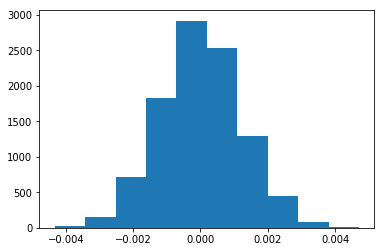

In [71]:
#to plot a histogram of p_diffs
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [72]:
#to get the mean of control group conversion
p_control = df2.query('group == "control"').converted.mean()
p_control

0.1203863045004612

In [73]:
#to get the mean of treatment group conversion
p_treatment = df2.query('group == "treatment"').converted.mean()
p_treatment

0.11880806551510564

In [74]:
obs_diff = p_treatment- p_control
obs_diff

-0.0015782389853555567

In [75]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

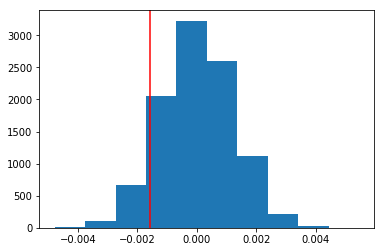

In [76]:
#to plot the distribution - null_vals
plt.hist(null_vals);
plt.axvline(obs_diff, c='red');

In [77]:
#to obtain the p-value
p_val = (null_vals > obs_diff).mean()
p_val

0.90429999999999999

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Ans. We found that the p-value of .91 is greater than the alpha level i.e. .05. Since the p-value is the probability of observing our statistic or one more extreme in favor of the alternative, and also since the p-value is greater than the alpha then here we fail to reject the null hypothesis. i.e. we cannot favour the alternate hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [79]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page'")['converted'].sum()
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

C:\Users\Chipz\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [80]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller') #Smaller for < sign in alternate hypothesis as it says old < new
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

1. Note The pvalue in this section should match the result of Part ii 2j (0.9)
2. Required Remember, the order in which the elements for the first and second arguments are entered need to directly correspond with the alternative parameter. Currently, the pvalue you are deriving means that your alternative parameter is not correct. For example...

    2.1. Let's say my setup is: H0 : rate1 <= rate2 ; H1 : rate1>rate2.
    
    2.2. This is the same as if we were to say: H0 : rate1-rate2 <= 0 ; H1 : rate1-rate2 > 0.
    
    2.3. When using the proportions_ztest, you can think of the order you insert the elements is the way the test interprets 
      what your hypotheses are.
      
    2.4. So if your first list is [counts_old, counts_new] and the second list is [total_old, total_new], and your alternative =         'smaller', you are essentially saying your H1 : old-new < 0
    
3. So now remember, the instructions want us to assume old >= new unless new > old OR old-new >= 0 unless old-new<0. How would      the test need to be setup then?

In [82]:
#to get the critical value relating to z-value
from scipy.stats import norm

norm.cdf(z_score) # Tells us how significant our z-score is

norm.ppf(1-(0.05/2)) # Tells us what our critical value at 95% confidence is

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Ans. Since the z-score of 1.3109241984234394 does not exceed the critical value of 1.959963984540054 and also since the p-value (0.9051) exceeds the alpha value(.05), we fail to reject the null hypothesis. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression, as we have a variable with only 2 probable value.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [83]:
import statsmodels.api as sm

In [84]:
df2['intercept'] = 1 #to add an intercept column having values 1
df2['ab_page'] = np.where(df2['group']=="treatment", 1, 0) #to add ab_page column having values 0 and 1
df2.head()                          

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [85]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [86]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 Jan 2018   Pseudo R-squ.:               8.077e-06
Time:                        10:04:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Ans. P value of ab_page is found to be 1.190. Hypothesis for regression model is below.
1. $H_{0}: p_{old} = p_{new}$
2. $H_{1}: p_{new} !=  p_{old}$

In part II we did 1-tailed test but here we are doing 2 tailed test, hence there was difference in P values.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Ans. We have only 1 explanatory variables here, there might be other factors which could lead to user acquisition or could explain the non increment in user acquisition, these could be better explained if we could look on different variables.

Adding additional terms can lead to overfitting, if additional terms are interdependent then it could lead to complications and also we need to be sure about factors like VIFs etc before using additional terms. We could increase the current data set of run testing multiple times too.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [87]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [88]:
### Create the necessary dummy variables
df_new.reset_index(inplace=True)
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [90]:
### Fit Your Linear Model And Obtain the Results
lm = sm.OLS(df_new['converted'], df_new[['intercept', 'US', 'UK']]) #using only 2 dummy variables from country",
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Sat, 20 Jan 2018   Prob (F-statistic):              0.201
Time:                        10:04:54   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1153      0.003     42.792      0.000       0.110       0.121
US             0.0042      0.003      1.516      0.130      -0.001       0.010
UK             0.0053      0.003      1.787      0.074      -0.001       0.011
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         9.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='conclusions'></a>
## Conclusions
1. In part 1, we proved that there is no significant difference in conversion rate when used old and new landing page.
2. In part 2, using 1-tailed A/B test, our evaluation resulted the P-value which suggested we cannot reject the null.
3. In part 3, we used logistic regression and evaluated that the P-Value of ab_page is non significant for us to predict the conversion of user, neither user location is significant in predicting user conversion.

Hence, with current data set, we could conclude that new page have no effect on user conversion.


Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.